In [246]:
import pandas as pd
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import preprocessing
import random
import numpy as np

In [247]:
def dataset_to_Xandy(dataset, target_variable):
    X = dataset.loc[:, dataset.columns != target_variable]
    y = dataset.loc[:, dataset.columns == target_variable]
    return X, y

def standardise(X):
    return (X - np.mean(X)) / np.std(X)

def split_dataset(X,y, randomlist, not_in_randomlist):
    X_train = X.iloc[randomlist,:]
    y_train = y.iloc[randomlist,:]
    X_test = X.iloc[not_in_randomlist,:]
    y_test = y.iloc[not_in_randomlist,:]
    return X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()

def plot_conf_matrix(confusion_matrix,encoding):
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    cm_display.plot()
    plt.title('Confusion matrix for '+str(encoding)+' encoding')
    plt.show()  

def calc_conf_matrix(X,y,randomlist,not_in_randomlist,classifier):
    X_train, y_train, X_test, y_test = split_dataset(X,y,randomlist, not_in_randomlist)
    
    # depending on what the user inputs
    if classifier == 'logistic':
        model = LogisticRegression(penalty = 'none')  
    elif classifier == 'kNN':
        model = KNeighborsClassifier()  
    
    # perform fitting of the model 
    model.fit(X_train, y_train.reshape(-1,))  
    y_predicted = model.predict(X_test) 
    
    # computing confusion matrix, fpr, tpr, auc
    matrix = metrics.confusion_matrix(y_test, y_predicted)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted)
    area_roc = metrics.auc(fpr, tpr)
    return matrix[0,0], matrix[0,1], matrix[1,0], matrix[1,1], area_roc

def plot_boxplots_confusion(confusion_matrix,entry,which_dataset):
    dictionary = {}
    for key in confusion_matrix:
        dictionary[key] = confusion_matrix[key][entry]
    fig, ax = plt.subplots()
    ax.boxplot(dictionary.values())
    ax.set_xticklabels(dictionary.keys())
    if entry == '00':
        name = 'true negative'
    elif entry == '01':
        name = 'false positive'
    elif entry == '10':
        name = 'false negative'
    elif entry == '11':
        name = 'true positive'
    elif entry == 'accuracy':
        name = 'accuracy'
    elif entry == 'auc':
        name = 'area under ROC curve'
    plt.title('Boxplots of ' + name +' \n Test Size '+ str(out_of)+'\n Dataset:'+which_dataset)
    plt.show()    
    

def put_in_bins(data, how_many_bins):
    mi = min(data)
    ma = max(data)

    bins = np.linspace(mi+0.0001, ma+0.0001,how_many_bins)
    digitized = np.digitize(data,bins)
    midpoints_bins = (bins[:len(bins)-1] + bins[1:])/2
    new_data = midpoints_bins[digitized-1]
    return new_data

In [248]:
######### HEART DATASET    

which_dataset = 'Heart Ilness'
df = pd.read_csv('datasets/heartdataset.csv')
categorical_cols = ['cp','thal','slope','ca','restecg'] # Putting in this all the categorical columns
target_variable = 'target' # Making sure the name of the target variable is known
continuous_variables = ['age','trestbps','chol','thalach','oldpeak']
binary_variables = ['sex','fbs','exang']
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [249]:
######### AIRLINE DATASET  

# df = pd.read_csv('datasets/airline_dataset.csv')
# categorical_cols = ['MONTH','DAY_OF_WEEK','DEP_TIME_BLK','DISTANCE_GROUP','SEGMENT_NUMBER','CARRIER_NAME', 'DEPARTING_AIRPORT','PREVIOUS_AIRPORT'] # Putting in this all the categorical columns
# target_variable = 'DEP_DEL15' # Making sure the name of the target variable is known

# df0 = df.loc[df[target_variable] ==0 ]
# df1 = df.loc[df[target_variable] ==1 ]
# how_many_0 = df0.shape[0]
# how_many_1 = df1.shape[0]
# random_indices = random.sample(range(0, how_many_0), how_many_0 - 4000)
# df0 = df0.drop(df0.index[random_indices])
# random_indices = random.sample(range(0, how_many_1), how_many_1 - 4000)
# df1 = df1.drop(df1.index[random_indices])
# df = pd.concat([df0, df1])

In [250]:
######### CAR INSURANCE DATASET  

# df = pd.read_csv('datasets/cardataset.csv')
# df = df.drop('policy_id',axis = 1)
# categorical_cols = ['area_cluster','make', 'segment','model', 'fuel_type','max_torque','max_power','engine_type','steering_type','ncap_rating'] # Putting in this all the categorical columns
# target_variable = 'is_claim' # Making sure the name of the target variable is known

# binary_cols = ['gear_box','is_esc','is_adjustable_steering','is_tpms',
#                 'is_parking_sensors','is_parking_camera','rear_brakes_type',
#                 'cylinder','transmission_type','is_front_fog_lights'
#                 ,'is_rear_window_wiper','is_rear_window_washer'
#                 ,'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
#                 'is_central_locking','is_power_steering','is_driver_seat_height_adjustable',
#                 'is_day_night_rear_view_mirror','is_ecw','is_speed_alert']

# ### make sure binary variables are 0 and 1
# labelencoder = ce.OrdinalEncoder(cols=binary_cols)
# df = labelencoder.fit_transform(df)

In [251]:
########### WINE QUALITY
# df = pd.read_csv('datasets/wine_dataset.csv')
# target_variable = 'quality' # Making sure the name of the target variable is known
# df[target_variable] = df[target_variable].replace(['bad'], 0)
# df[target_variable] = df[target_variable].replace(['good'], 1)

# categorical_cols = [] # Putting in this all the categorical columns
# continuous_variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#        'pH', 'sulphates', 'alcohol']

In [252]:
# ########### STROKE PREDICTION
# df = pd.read_csv('datasets/stroke_dataset.csv')
# df = df.drop('id',axis = 1)
# df = df.dropna().reset_index(drop=True)
# df = df.replace('*82', 82)
# categorical_cols = ['gender','work_type','smoking_status'] # Putting in this all the categorical columns
# target_variable = 'stroke' # Making sure the name of the target variable is known

# binary_cols = ['Residence_type','ever_married','heart_disease','hypertension']

# ### make sure binary variables are 0 and 1
# labelencoder = ce.OrdinalEncoder(cols=binary_cols)
# df = labelencoder.fit_transform(df)

In [253]:
# ########### BODY SIGNAL SMOKING
# df = pd.read_csv('datasets/bodysignal_smoking.csv')
# df = df.drop(['ID','oral'],axis = 1)


# categorical_cols = ['Urine protein','eyesight(right)','eyesight(left)'] # Putting in this all the categorical columns
# target_variable = 'smoking' # Making sure the name of the target variable is known

# binary_cols = ['tartar','dental caries','hearing(right)','hearing(left)','gender']

# ### make sure binary variables are 0 and 1
# labelencoder = ce.OrdinalEncoder(cols=binary_cols)
# df = labelencoder.fit_transform(df)

In [254]:
###### START - PREPROCESSING

size = df.shape[0] # size of the dataset

# Seeing if they are indeed categorical
if len(categorical_cols) > 0:
    for cat in categorical_cols:
        print(df[cat].value_counts())
else:
    print('No Categorical Variables')

0    497
2    284
1    167
3     77
Name: cp, dtype: int64
2    544
3    410
1     64
0      7
Name: thal, dtype: int64
1    482
2    469
0     74
Name: slope, dtype: int64
0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64
1    513
0    497
2     15
Name: restecg, dtype: int64


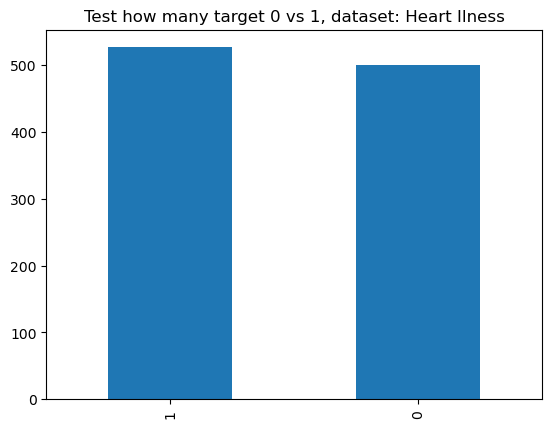

In [255]:
# Seeing if the data is balanced
plt.figure()
df[target_variable].value_counts().plot(kind='bar')
plt.title('Test how many target 0 vs 1, dataset: '+ which_dataset)
plt.show()

In [256]:
# If all columns are continuous, we bin some columns
if len(categorical_cols) == 0:
    binned_df = df
    for cat in continuous_variables:
        binned_df[cat] = put_in_bins(binned_df[cat], 20)
binned_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.617767          0.902279     2.413549       -0.347148    0.04433   
1      -0.275964          1.734551     2.413549        0.172112    0.04433   
2      -0.275964          1.318415    -1.255923       -0.347148    0.04433   
3       1.774851         -1.178401     0.782673       -0.347148   -0.57205   
4      -0.617767          0.902279     2.413549       -0.347148    0.04433   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.541437             -0.546697  0.496353  1.266139  -0.629924   
1             0.861167              0.752859  0.118055 -0.883072  -0.123769   
2            -0.190786              0.319674  0.118055 -0.453230  -0.123769   
3             0.159865              0.319674  0.496353 -0.883072  -0.629924   
4            -0.541437             -0.546697  0.496353  1.266139  -0.629924   

    alcohol  quality  
0 -1.096337        0  
1 -0.459908        0  
2 -0.459908        0  
3 -0.459908        1  
4 -1.096337        0

In [257]:
# If all columns are continuous, we bin some columns
if len(categorical_cols) == 0:
    for cont_col in continuous_variables:
        binned_df[cont_col] = standardise(binned_df[cont_col])

binned_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.617767          0.902279     2.413549       -0.347148    0.04433   
1      -0.275964          1.734551     2.413549        0.172112    0.04433   
2      -0.275964          1.318415    -1.255923       -0.347148    0.04433   
3       1.774851         -1.178401     0.782673       -0.347148   -0.57205   
4      -0.617767          0.902279     2.413549       -0.347148    0.04433   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.541437             -0.546697  0.496353  1.266139  -0.629924   
1             0.861167              0.752859  0.118055 -0.883072  -0.123769   
2            -0.190786              0.319674  0.118055 -0.453230  -0.123769   
3             0.159865              0.319674  0.496353 -0.883072  -0.629924   
4            -0.541437             -0.546697  0.496353  1.266139  -0.629924   

    alcohol  quality  
0 -1.096337        0  
1 -0.459908        0  
2 -0.459908        0  
3 -0.459908        1  
4 -1.096337        0

In [258]:
# Normalising the continuous variables
for cont_col in continuous_variables:
    df[cont_col] = standardise(df[cont_col])

df.head()

age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0 -0.268437    1   0 -0.377636 -0.659332    0        1  0.821321      0   
1 -0.158157    1   0  0.479107 -0.833861    1        0  0.255968      1   
2  1.716595    1   0  0.764688 -1.396233    0        1 -1.048692      1   
3  0.724079    1   0  0.936037 -0.833861    0        1  0.516900      0   
4  0.834359    0   0  0.364875  0.930822    1        1 -1.874977      0   

    oldpeak  slope  ca  thal  target  
0 -0.060888      2   2     3       0  
1  1.727137      0   0     3       0  
2  1.301417      0   0     3       0  
3 -0.912329      2   1     3       0  
4  0.705408      1   3     2       0

In [259]:
how_many_iterations = 20 # how many CV folds

# initialising confusion matrices

confusion_matrix = {}
confusion_matrix['no_cat'] =  {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}
confusion_matrix['simple'] =   {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}
confusion_matrix['onehot'] =  {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}
confusion_matrix['target'] =   {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}
confusion_matrix['effect'] =  {'00':np.zeros((how_many_iterations,)),'10':np.zeros((how_many_iterations,)),'01':np.zeros((how_many_iterations,)),'11':np.zeros((how_many_iterations,)),
                               'accuracy':np.zeros((how_many_iterations,)), 'auc':np.zeros((how_many_iterations,))}

out_of = size - 4 * size // 5

classifier = 'logistic' 

In [260]:

for iteration in range(how_many_iterations):
    
    # Randomising the CV fold
    randomlist = random.sample(range(0, size),  4 * size// 5)
    not_in_randomlist = list(set(range(0,size)) - set(randomlist))
 
    
    
    ### PREDICTION WITHOUT THE CATEGORICAL ONES
    
    if len(categorical_cols) > 0:
        X, y =  dataset_to_Xandy(df.drop(categorical_cols, axis = 1), target_variable)
    else:
        X, y =  dataset_to_Xandy(df, target_variable)
        
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['no_cat']['00'][iteration] = m0
    confusion_matrix['no_cat']['01'][iteration] = m1
    confusion_matrix['no_cat']['10'][iteration] = m2
    confusion_matrix['no_cat']['11'][iteration] = m3
    confusion_matrix['no_cat']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['no_cat']['auc'][iteration] = auc
    
    
  
    ### SIMPLE ENCODING
    
    if len(categorical_cols) > 0:
        labelencoder = ce.OrdinalEncoder(cols=categorical_cols)
        new_df = labelencoder.fit_transform(df)
    else:
        labelencoder = ce.OrdinalEncoder(cols=continuous_variables)
        new_df = labelencoder.fit_transform(binned_df)
        
    X,y =  dataset_to_Xandy(new_df, target_variable)    
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['simple']['00'][iteration] = m0
    confusion_matrix['simple']['01'][iteration] = m1
    confusion_matrix['simple']['10'][iteration] = m2
    confusion_matrix['simple']['11'][iteration] = m3
    confusion_matrix['simple']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['simple']['auc'][iteration] = auc
  
    
    
    ### ONE HOT ENCODING
    
    if len(categorical_cols) > 0:
        encoder = ce.OneHotEncoder(cols=categorical_cols,use_cat_names=True)
        new_df = encoder.fit_transform(df)
    else:
        encoder = ce.OneHotEncoder(cols=continuous_variables,use_cat_names=True)
        new_df = encoder.fit_transform(binned_df)
        
    X,y =  dataset_to_Xandy(new_df, target_variable)
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['onehot']['00'][iteration] = m0
    confusion_matrix['onehot']['01'][iteration] = m1
    confusion_matrix['onehot']['10'][iteration] = m2
    confusion_matrix['onehot']['11'][iteration] = m3
    confusion_matrix['onehot']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['onehot']['auc'][iteration] = auc
    
    
    
    #### EFFECT ENCODING
    
    if len(categorical_cols) > 0:
        encoder = ce.sum_coding.SumEncoder(cols=categorical_cols,verbose=False)
        new_df = encoder.fit_transform(df)
    else:
        encoder = ce.sum_coding.SumEncoder(cols=continuous_variables,verbose=False)
        new_df = encoder.fit_transform(binned_df)

    X,y =  dataset_to_Xandy(new_df, target_variable)
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['effect']['00'][iteration] = m0
    confusion_matrix['effect']['01'][iteration] = m1
    confusion_matrix['effect']['10'][iteration] = m2
    confusion_matrix['effect']['11'][iteration] = m3
    confusion_matrix['effect']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['effect']['auc'][iteration] = auc
    
    
    
    ##### TARGET ENCODING
    
    if len(categorical_cols) > 0:
        TE_encoder = ce.TargetEncoder(cols=categorical_cols)
        new_df = TE_encoder.fit_transform(df, df[target_variable])
    else:
        TE_encoder = ce.TargetEncoder(cols=continuous_variables)
        new_df = TE_encoder.fit_transform(binned_df, binned_df[target_variable])
        
    X,y =  dataset_to_Xandy(new_df, target_variable)
    m0, m1, m2, m3, auc = calc_conf_matrix(X,y,randomlist,not_in_randomlist, classifier)
    confusion_matrix['target']['00'][iteration] = m0
    confusion_matrix['target']['01'][iteration] = m1
    confusion_matrix['target']['10'][iteration] = m2
    confusion_matrix['target']['11'][iteration] = m3
    confusion_matrix['target']['accuracy'][iteration] = (m0+m3) / out_of
    confusion_matrix['target']['auc'][iteration] = auc

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternat

/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/Users/roatisiris/opt/anaconda3/lib/python3.9/site-packages/category_encoders/base_contr

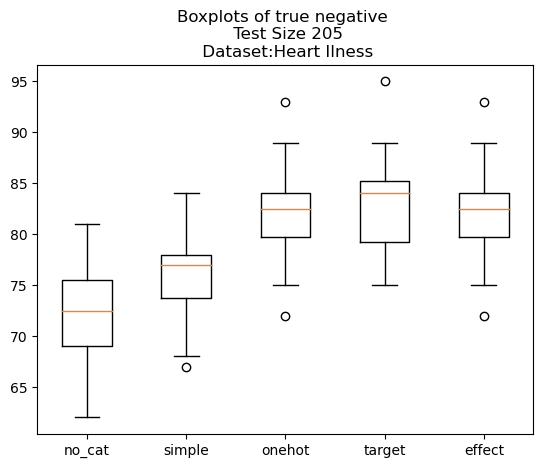

In [261]:
plot_boxplots_confusion(confusion_matrix, '00', which_dataset)

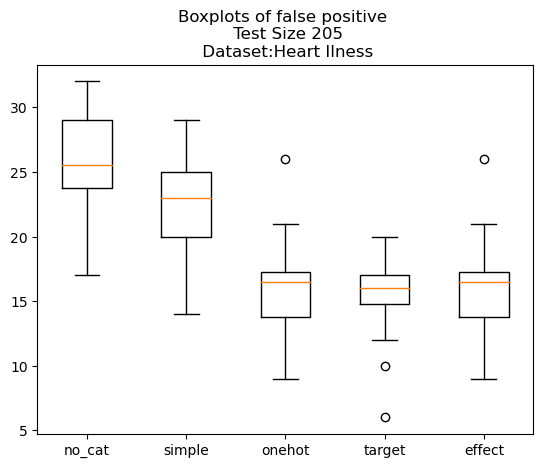

In [262]:
plot_boxplots_confusion(confusion_matrix, '01', which_dataset)

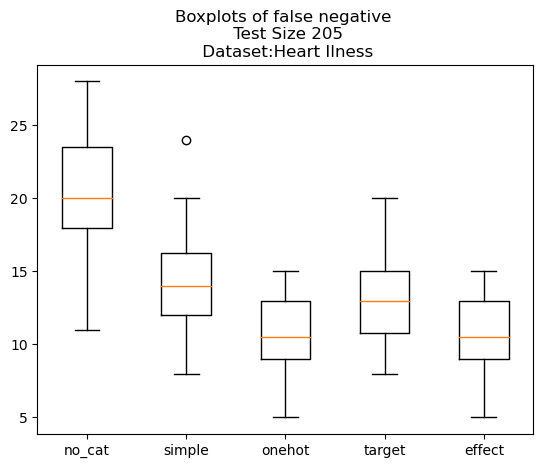

In [263]:
plot_boxplots_confusion(confusion_matrix, '10', which_dataset)

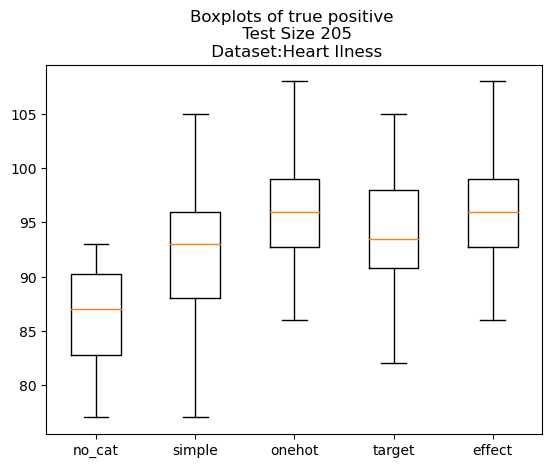

In [264]:
plot_boxplots_confusion(confusion_matrix, '11', which_dataset)

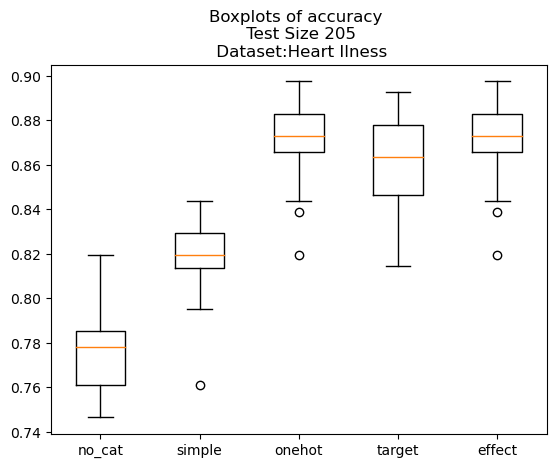

In [265]:
plot_boxplots_confusion(confusion_matrix, 'accuracy', which_dataset)

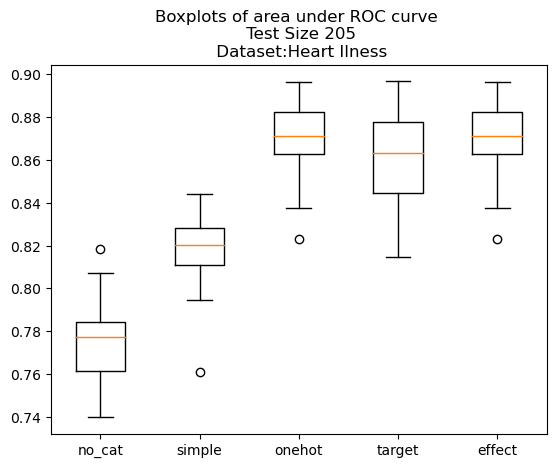

In [266]:
plot_boxplots_confusion(confusion_matrix, 'auc', which_dataset)